**Model Training**

**Import Data and Required Packages**

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

**Kaggle Dataset**
* [Student Dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)


**Import the CSV Data using Pandas DataFrame**

In [26]:
df = pd.read_csv('Student.csv')

In [27]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Show Top 5 Records**

In [28]:
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
df.tail()

,gender,race_ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


**Preparing 'X' and 'Y' variables**


1.   Preparing 'X' Varibale



In [30]:
X = df.drop(columns=['math_score'],axis=1)

In [31]:
X.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [32]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental education' variable:",end=" " )
print(df['parental_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


2. Preparing 'Y' Variable

In [33]:
y = df['math_score']

In [34]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [35]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [36]:
X = preprocessor.fit_transform(X)

In [37]:
X.shape

(1000, 19)

In [38]:
# Separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((700, 19), (300, 19))

**Create an Evaluate Function to give all metrics after model Training**

In [39]:
#Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [40]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('---------------------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*45)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2728
- Mean Absolute Error: 4.2365
- R2 Score: 0.8850
---------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5958
- Mean Absolute Error: 4.3956
- R2 Score: 0.8445


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 5.2668
- Mean Absolute Error: 4.2322
- R2 Score: 0.8853
---------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5467
- Mean Absolute Error: 4.3486
- R2 Score: 0.8472


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3339
- Mean Absolute Error: 1.8389
- R2 Score: 0.9775
---------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9634
- Mean Absolute Error: 4.8043
- R2 Score: 0.8234




**Displaying Results**

In [41]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Ridge Regression,0.847221
0,Linear Regression,0.844505
2,Random Forest Regressor,0.823403


**Linear Regression Model**

In [42]:
linear_model = LinearRegression()
linear_model = linear_model.fit(X_train, y_train)
linear_y_predict = linear_model.predict(X_test)
score = r2_score(y_test, linear_y_predict)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 84.45


**Scatter Plot of linear_y_pred (Predicted Value) and y_test (Actual Value) in Linear Regression**

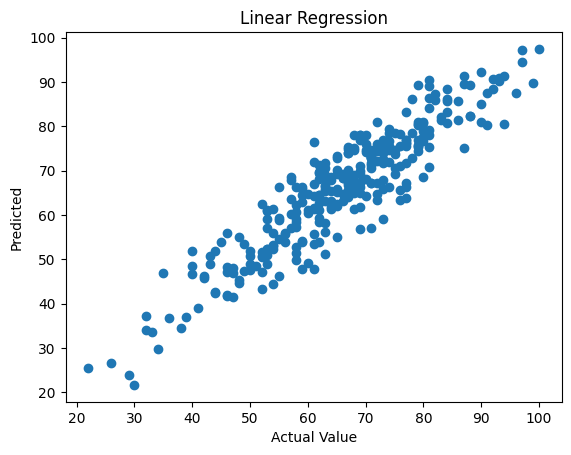

In [43]:
plt.scatter(y_test, linear_y_predict);
plt.title("Linear Regression")
plt.xlabel('Actual Value');
plt.ylabel('Predicted');

In [44]:
# from google.colab import drive
# drive.mount('/content/drive')

**Regression Plot For Linear Regression**

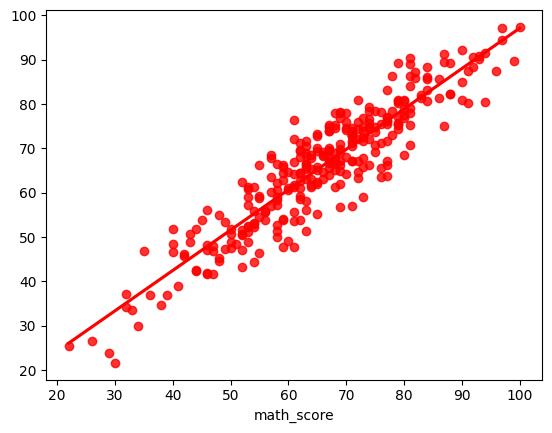

In [45]:
sns.regplot(x=y_test,y=linear_y_predict,ci=None,color ='red');

**Difference between Actual and Predicted Values in Linear Regression**

In [46]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':linear_y_predict,'Difference':y_test-linear_y_predict})
pred_df

,Actual Value,Predicted Value,Difference
993,62,62.640625,-0.640625
859,87,75.140625,11.859375
298,40,48.546875,-8.546875
553,77,66.234375,10.765625
672,69,69.953125,-0.953125
...,...,...,...
167,58,62.203125,-4.203125
998,68,66.531250,1.468750
984,74,74.640625,-0.640625
491,64,61.750000,2.250000


**Ridge Regression**

In [47]:
ridge_model = Ridge()
ridge_model = ridge_model.fit(X_train, y_train)
ridge_y_predict = ridge_model.predict(X_test)
score = r2_score(y_test, ridge_y_predict)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 84.72


**Plot ridge_y_pred (Predicted Value) and y_test (Actual Value) in Ridge Regression**

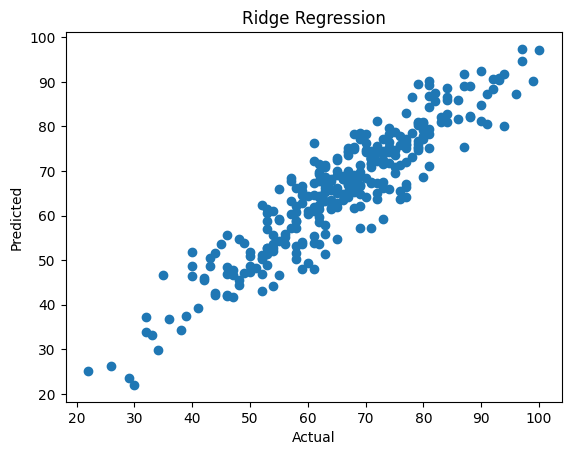

In [48]:
plt.scatter(y_test,ridge_y_predict);
plt.title("Ridge Regression")
plt.xlabel('Actual');
plt.ylabel('Predicted');

**Regression Plot For Ridge Regression**

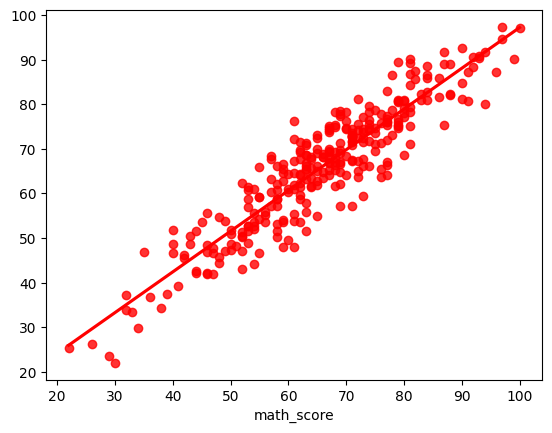

In [49]:
sns.regplot(x=y_test,y=ridge_y_predict,ci=None,color ='red');

**Difference between Actual and Predicted Values in Ridge Regression**

In [50]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':ridge_y_predict,'Difference':y_test-ridge_y_predict})
pred_df

,Actual Value,Predicted Value,Difference
993,62,62.416498,-0.416498
859,87,75.326900,11.673100
298,40,48.748805,-8.748805
553,77,66.415352,10.584648
672,69,69.673026,-0.673026
...,...,...,...
167,58,62.076520,-4.076520
998,68,66.396061,1.603939
984,74,74.232442,-0.232442
491,64,61.416831,2.583169


**Random Forest**

In [51]:
random_forest_model = RandomForestRegressor()
random_forest_model = random_forest_model.fit(X_train, y_train)
random_y_predict = random_forest_model.predict(X_test)
score = r2_score(y_test, random_y_predict)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 81.92


**Plot random_y_pred (Predicted Value) and y_test (Actual Value) in Random Forest**

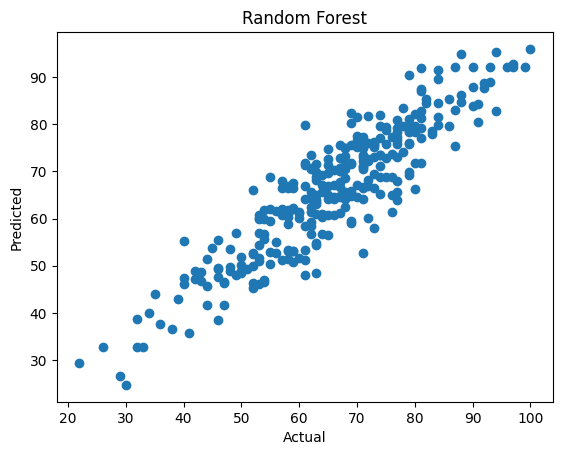

In [52]:
plt.scatter(y_test,random_y_predict);
plt.title("Random Forest")
plt.xlabel('Actual');
plt.ylabel('Predicted');

**Regression Plot For Random Forest**

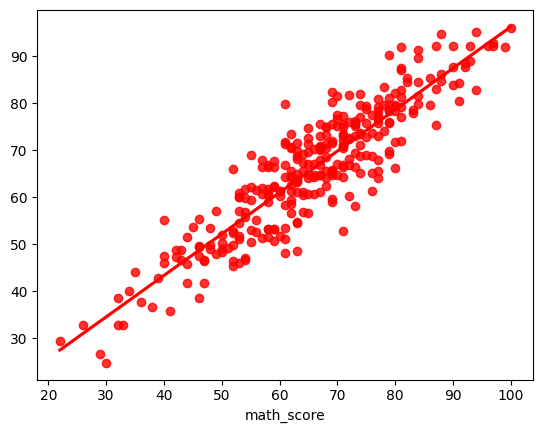

In [53]:
sns.regplot(x=y_test,y=random_y_predict,ci=None,color ='red');

**Difference between Actual and Predicted Values in Random Forest**

In [54]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':random_y_predict,'Difference':y_test-random_y_predict})
pred_df

,Actual Value,Predicted Value,Difference
993,62,62.54,-0.54
859,87,75.37,11.63
298,40,47.41,-7.41
553,77,65.58,11.42
672,69,71.86,-2.86
...,...,...,...
167,58,66.43,-8.43
998,68,70.42,-2.42
984,74,71.10,2.90
491,64,60.43,3.57


**Comparison**

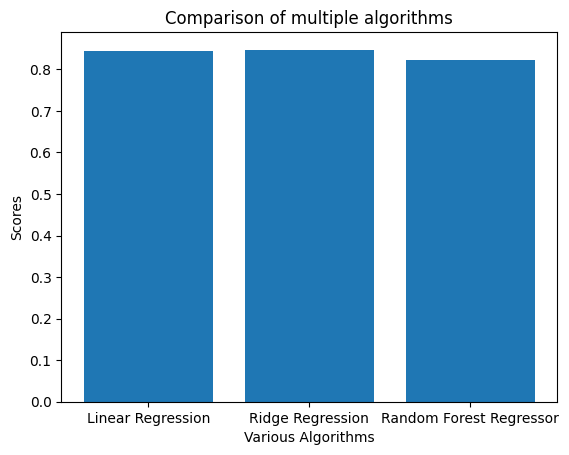

In [55]:
plt.bar(model_list, r2_list)
plt.xlabel("Various Algorithms")
plt.ylabel("Scores")
plt.title("Comparison of multiple algorithms")
plt.show()